# Function Example
This notebook will show how to use the `fdasrsf` package to align and statistically analyze a set of functions using the SRVF framework

## Load Packages

In [91]:
import fdasrsf as fs
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm, svd
from scipy.integrate import trapz, cumtrapz
import fdasrsf.utility_functions as uf

data = np.load('simu_data.npz')
time = data['arr_1']
f = data['arr_0']

## Analyze
We now will construct a `fdawarp` object

In [2]:
obj = fs.fdawarp(f,time)

Will now align the functions

In [3]:
obj.srsf_align(parallel=True)


Initializing...
Compute Karcher Mean of 21 function in SRSF space...
updating step: r=1
updating step: r=2


Plot the results

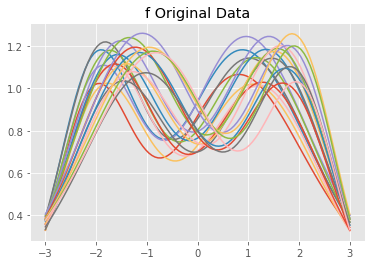

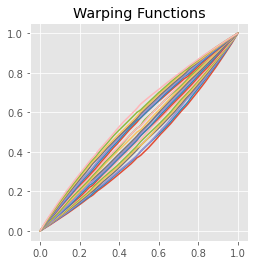

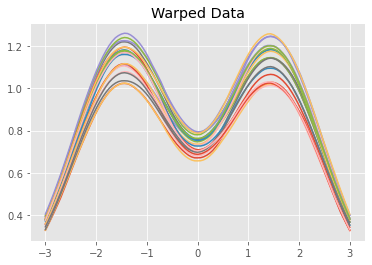

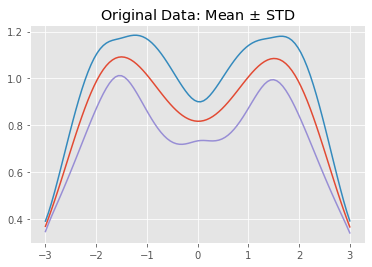

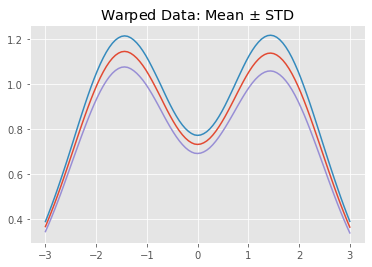

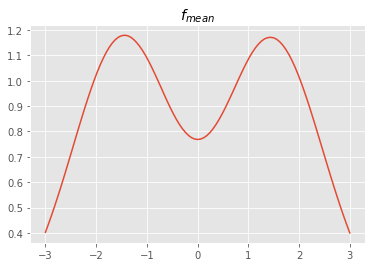

In [5]:
obj.plot()

## Horizontal PCA
Now analyze the phase component using horizontal fPCA

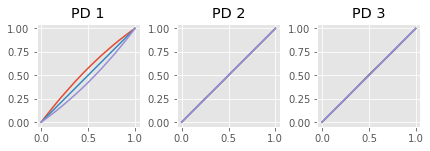

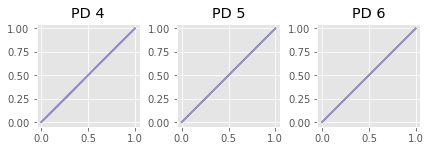

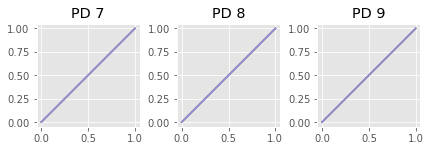

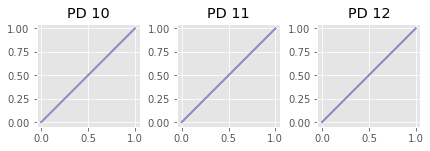

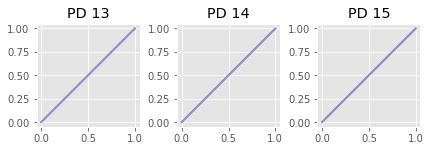

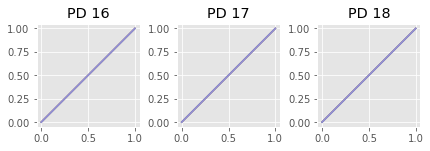

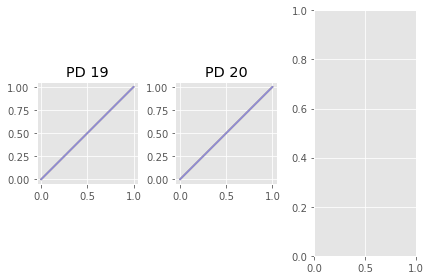

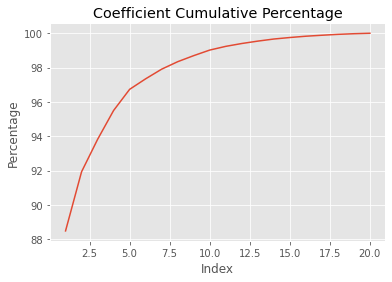

In [74]:
nsample = 21
ncomph = 20
hpca = fs.fdahpca(obj)
hpca.calc_fpca(no=ncomph)
hpca.plot()

In [156]:
def warp_f_gamma(time, f, gam):
    """
    warps a function f by gam
    :param time vector describing time samples
    :param q vector describing srsf
    :param gam vector describing warping function
    :rtype: numpy ndarray
    :return f_temp: warped srsf
    """
    M = gam.size
    f_temp = interp((time[-1] - time[0]) * gam + time[0], time, f)

    return f_temp


h_U = hpca.U
h_coef = hpca.coef
h_vec = hpca.vec
N=101
h_mu = hpca.psi_mu

w_gam = obj.gam

v_s = np.ndarray(shape=(N, nsample), dtype=float)
psi_s = np.ndarray(shape=(N, nsample), dtype=float)
gam_s = np.ndarray(shape=(N, nsample), dtype=float)

for i in range(0,nsample):
    v_s[:,i] = 0
    for j in range(0,ncomph):
        v_s[:,i] = v_s[:,i] + h_coef[i,j]*h_U[:,j]
    vn = norm(v_s[:,i]) / np.sqrt(N)
    if vn < 0.0001:
        psi_s[:, i] = h_mu
    else:
        psi_s[:, i] = np.cos(vn) * h_mu + np.sin(vn) * v_s[:,i] / vn
    tmp = cumtrapz(psi_s[:, i] * psi_s[:, i], np.linspace(0,1,N), initial=0)
    gam_s[:, i] = (tmp - tmp[0]) / (tmp[-1] - tmp[0])
    
w_fn = obj.fn
w_f = obj.f
fn_rec = np.ndarray(shape=(N, nsample), dtype=float)
for i in range(0,nsample):
    fn_rec[:,i] = uf.warp_f_gamma(gam_s[:,i], w_fn[:,i], (time+3)/6)

In [157]:
print(h_coef.shape)
print(h_U.shape)
print(h_vec.shape)

(21, 20)
(101, 20)
(101, 21)


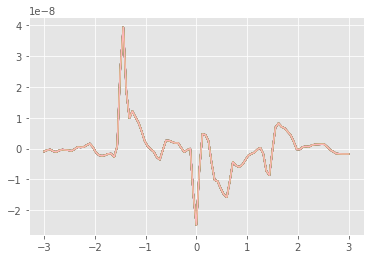

In [158]:
for i in range(0,nsample):
    plt.plot(time, h_vec[:,i] - v_s[:,i])

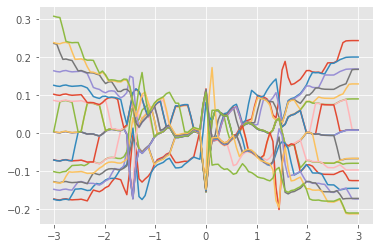

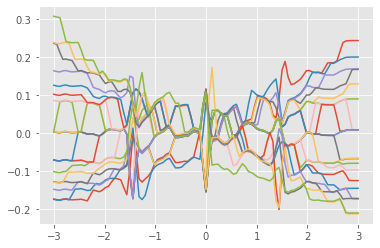

In [159]:
plt.figure(1)
for i in range(1,nsample):
    plt.plot(time, h_vec[:,i])
plt.figure(2)
for i in range(1,nsample):
    plt.plot(time, v_s[:,i])

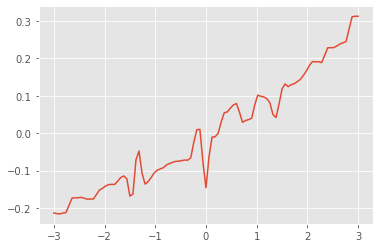

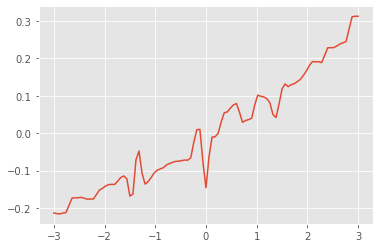

In [160]:
plt.figure(1)
for i in range(0,1):
    plt.plot(time, h_vec[:,i])
plt.figure(2)
for i in range(0,1):
    plt.plot(time, v_s[:,i])

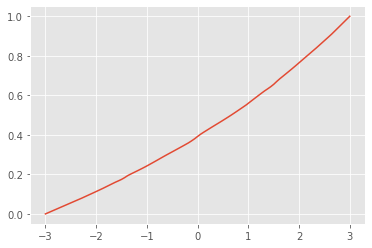

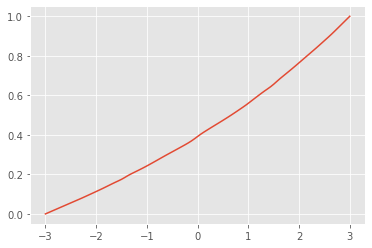

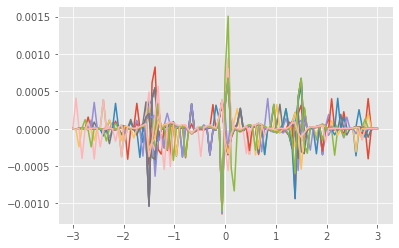

In [161]:
plt.figure(1)
for i in range(1,2):
    plt.plot(time, w_gam[:,i])
plt.figure(2)
for i in range(1,2):
    plt.plot(time, gam_s[:,i])
plt.figure(3)
for i in range(0,nsample):
    plt.plot(time, gam_s[:,i]-w_gam[:,i])

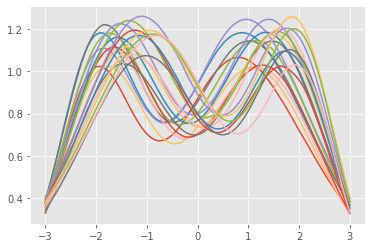

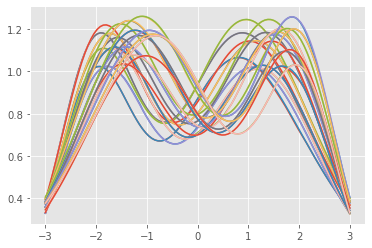

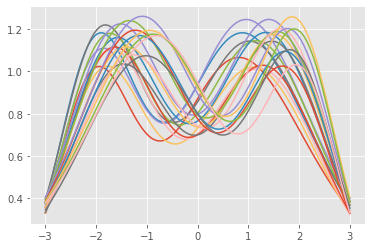

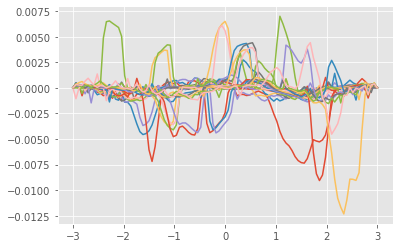

In [163]:
plt.figure(1)
for i in range(0,nsample):
    plt.plot(time, fn_rec[:,i])
plt.figure(2)
for i in range(0,nsample):
    plt.plot((w_gam[:,i]-0.5)*6, w_fn[:,i])
    plt.plot(time, w_f[:,i])
plt.figure(3)
for i in range(0,nsample):
    plt.plot(time, w_f[:,i])
plt.figure(4)
for i in range(0,nsample):
    plt.plot(time, fn_rec[:,i] - w_f[:,i])

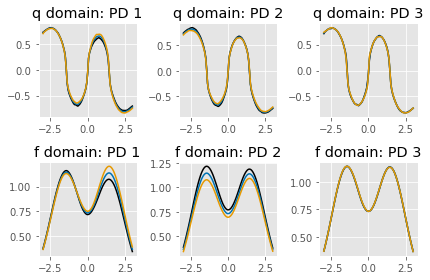

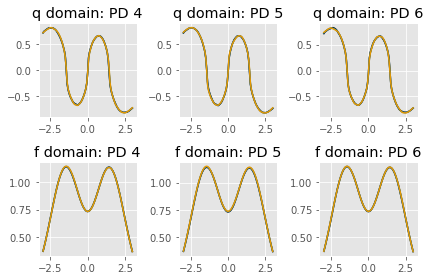

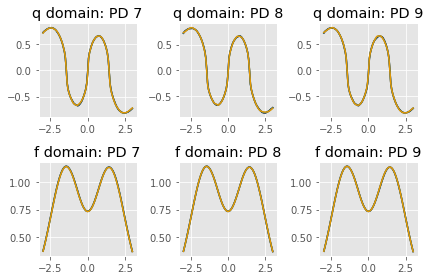

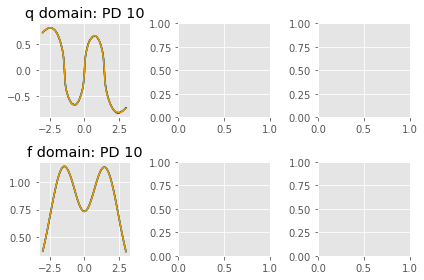

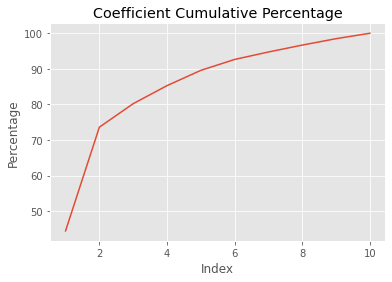

In [56]:
vpca = fs.fdavpca(obj)
vpca.calc_fpca(no=10)
vpca.plot()